In [1]:
import pandas as pd
import os 
import numpy as np # For dealing with numbers 
import matplotlib.pyplot as pl # For graphical visualizaion 
from ggplot import *  # For graphical visualisation-ggplot
import seaborn as sns # For graphical visualisation - seaborn 
from fancyimpute import KNN  # For KNN 
from scipy.stats import chi2_contingency # For chi-square test
from sklearn.model_selection import train_test_split #For test and train split


Using TensorFlow backend.


In [147]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [181]:
from sklearn import metrics

In [131]:
from sklearn.metrics import mean_absolute_error

In [2]:
import statsmodels.api as sm #For Linear Regression

In [3]:
os.chdir("C:/Users/Mahesh/Desktop/Final Project/New folder")


In [264]:
bike1 = pd.read_csv("day.csv")

In [265]:
bike1.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [285]:
bike.head(20)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,2011,1,0,6,0,2,0.344167,0.805833,0.160446,985
1,1,2011,1,0,0,0,2,0.363478,0.696087,0.248539,801
2,1,2011,1,0,1,1,1,0.196364,0.437273,0.248309,1349
3,1,2011,1,0,2,1,1,0.200000,0.590435,0.160296,1562
4,1,2011,1,0,3,1,1,0.226957,0.436957,0.186900,1600
5,1,2011,1,0,4,1,1,0.204348,0.518261,0.089565,1606
6,1,2011,1,0,5,1,2,0.196522,0.498696,0.168726,1510
7,1,2011,1,0,6,0,2,0.165000,0.535833,0.266804,959
8,1,2011,1,0,0,0,1,0.138333,0.434167,0.361950,822
9,1,2011,1,0,1,1,1,0.150833,0.482917,0.223267,1321


In [289]:
len(bike)

731

Before any pre-processing techniques such as looking for invalid data , we'll look at the missing values 

In [5]:
missing_val = pd.DataFrame(bike.isnull().sum())
missing_val = missing_val.reset_index()

missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})
print(missing_val)

     Variables  Missing_percentage
0      instant                   0
1       dteday                   0
2       season                   0
3           yr                   0
4         mnth                   0
5      holiday                   0
6      weekday                   0
7   workingday                   0
8   weathersit                   0
9         temp                   0
10       atemp                   0
11         hum                   0
12   windspeed                   0
13      casual                   0
14  registered                   0
15         cnt                   0


In [29]:
print(bike.dtypes)


dteday        datetime64[ns]
season              category
yr                  category
mnth                category
holiday             category
weekday             category
workingday          category
weathersit          category
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


Conversion of numeric columns with discrete values into factors


weathersit has 4 values i.e. 1,2,3,4 whose details is given below.I'll factorize it.


1: Clear, Few clouds, Partly cloudy, Partly cloudy


2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist


3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered
clouds.


4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog.


In [6]:
bike.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
bike = bike.drop(columns="instant")

In [271]:
bike['weekday'] = bike['weekday'].astype('object').astype('category',ordered = True)

C:\Users\Mahesh\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3325: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
bike['dteday'] = pd.to_datetime(bike['dteday'])

AxesSubplot(0.125,0.125;0.775x0.755)


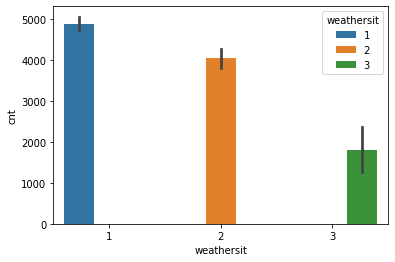

In [7]:
print(sns.barplot(x='weathersit',y='cnt',data=bike,hue='weathersit'))


As we can see , we only have discrete values of weathersit or weather , therefore we will factorize it.

1: Clear, Few clouds, Partly cloudy, Partly cloudy


2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist


3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered
clouds.


4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog.

We'll factorize the weathersit as it only contains 4 discrete options.

In [6]:
bike['weathersit'] = bike['weathersit'].astype('object').astype('category',ordered = True)

C:\Users\Mahesh\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3325: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  exec(code_obj, self.user_global_ns, self.user_ns)


AxesSubplot(0.125,0.125;0.775x0.755)


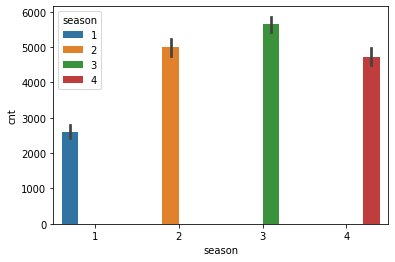

In [7]:
print(sns.barplot(x='season',y='cnt',data=bike,hue='season'))

Season is discretized as well  , 1 - spring , 2-summer  ,3 - fall and 4 - winter


Observation : bike count is least during the spring , and peaks during the season of fall

Also , the other facet of the data-set is that average count or average cnt is steady throughout the season 2 , 3 and 4


In [8]:
bike['season'] = bike['season'].astype('object').astype('category',ordered = True)

In [9]:
for i in range(0,len(bike)):
    if(bike['yr'].iloc[i] == 0):
        bike['yr'].iloc[i] = 2011
    else:
        bike['yr'].iloc[i] = 2012


C:\Users\Mahesh\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


AxesSubplot(0.125,0.125;0.775x0.755)


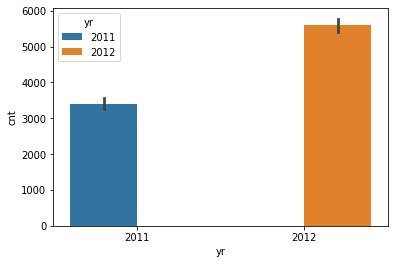

In [10]:
print(sns.barplot(x='yr',y='cnt',data=bike,hue='yr'))

We'll factorize the year variable as it is discrete. 


Also , we can observe the bike cnt has increased with year.

In [12]:
bike['yr'] = bike['yr'].astype('object').astype('category',ordered = True)

AxesSubplot(0.125,0.125;0.775x0.755)


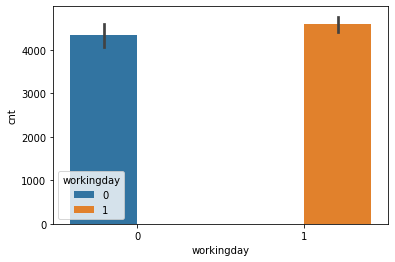

In [13]:
print(sns.barplot(x='workingday',y='cnt',data=bike,hue='workingday'))

AxesSubplot(0.125,0.125;0.775x0.755)
710


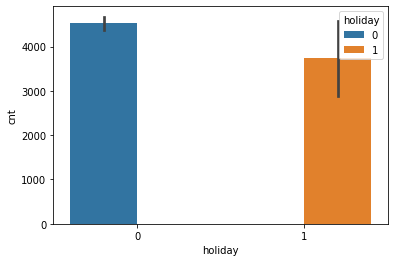

In [294]:
print(sns.barplot(x='holiday',y='cnt',data=bike,hue='holiday'))

cnt1 = 0 
for i in range(0,len(bike)):
    if(bike['holiday'].iloc[i]==0):
        cnt1 = cnt1+1
print(cnt1)

A couple of things : bike count total is more for working day than holiday.Also its discrete , so we will factorize it.

In [14]:
bike['workingday'] = bike['workingday'].astype('object').astype('category',ordered =True)

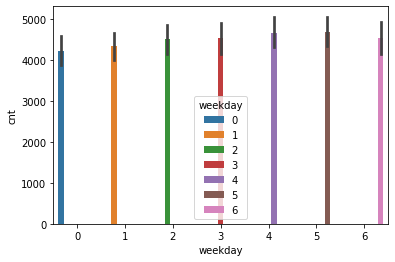

In [15]:
sns.barplot(x='weekday',y='cnt',data=bike,hue='weekday')

From the above barplot , we can see that the weekdays are discrete as well.Therefore we will factorize it.

Also the bike count is steady throughout the weekdays.

In [16]:
bike['weekday'] = bike['weekday'].astype('object').astype('category',ordered=True)

We will also factorize holiday as it's a discrete variable too

In [17]:
bike['holiday'] = bike['holiday'].astype('object').astype('category',ordered=True)

In [18]:
bike['mnth'] = bike['mnth'].astype('object').astype('category',ordered=True)

Exploratory Data Analysis

Text(0, 0.5, 'Count')

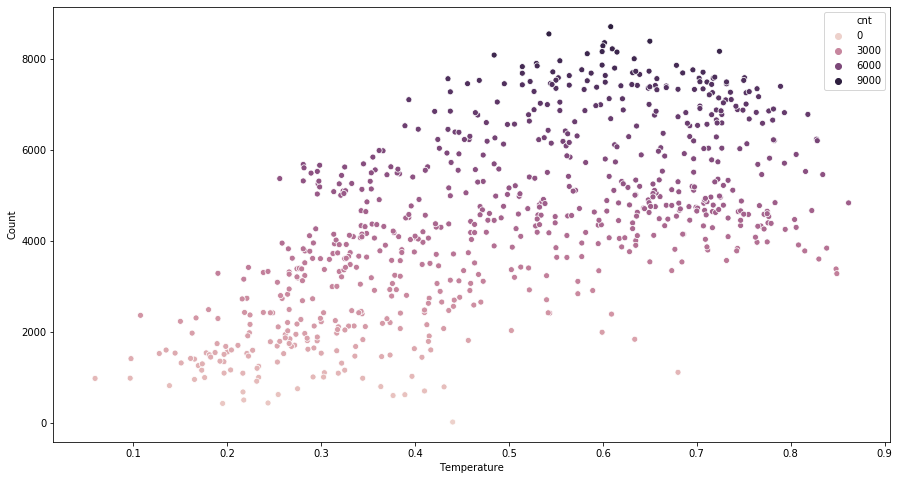

In [24]:
fig,ax1=pl.subplots(figsize=(15,8))
sns.scatterplot(x='temp',y='cnt',data=bike,hue='cnt',ax=ax1)
pl.xlabel('Temperature')
pl.ylabel('Count')

We can see from the above scatterplot that the bike count is directly in proportion with the Temperature(or temp) until it reaches a certain optimum temperature and then decreases as the temperature increases.

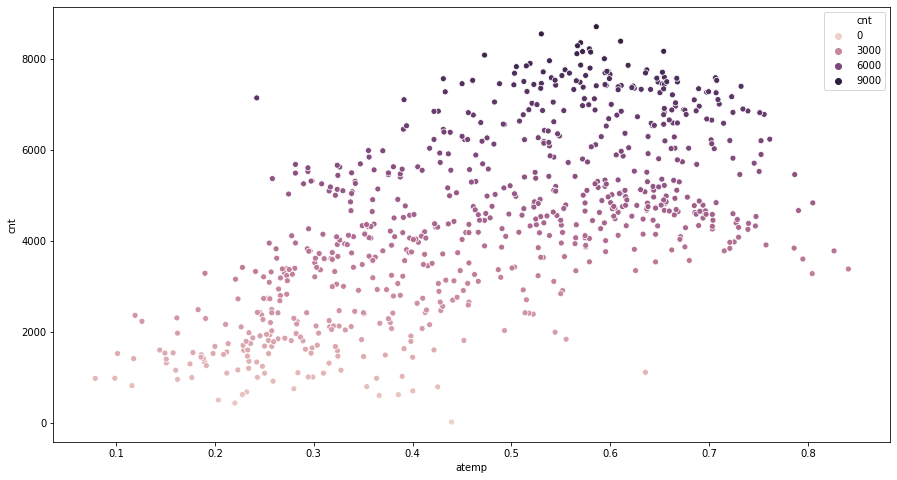

In [41]:
fig,ax1=pl.subplots(figsize=(15,8))
sns.scatterplot(x='atemp',y='cnt',data=bike,hue='cnt',ax=ax1)

atemp vs cnt and temp vs cnt produces the same results.
Therefore we will remove the atemp.

In [19]:
bike = bike.drop(columns='atemp')

Text(0, 0.5, 'Count')

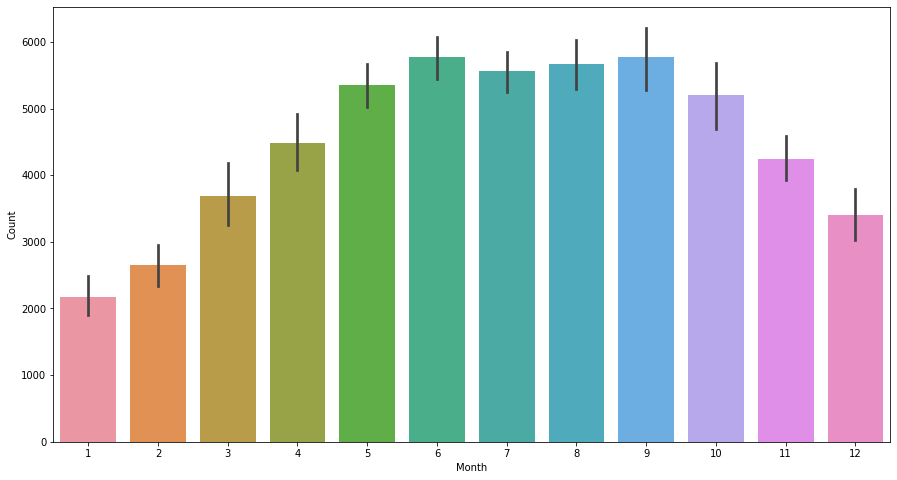

In [20]:
fig,ax1=pl.subplots(figsize=(15,8))
sns.barplot(x='mnth',y='cnt',data=bike,ax=ax1)
pl.xlabel('Month')
pl.ylabel('Count')

The count increases linearly with Month till the Month no 6 , goes down during August and up in September and then linearly decreases

Season and Month wise distribution with 

Text(0, 0.5, 'Count')

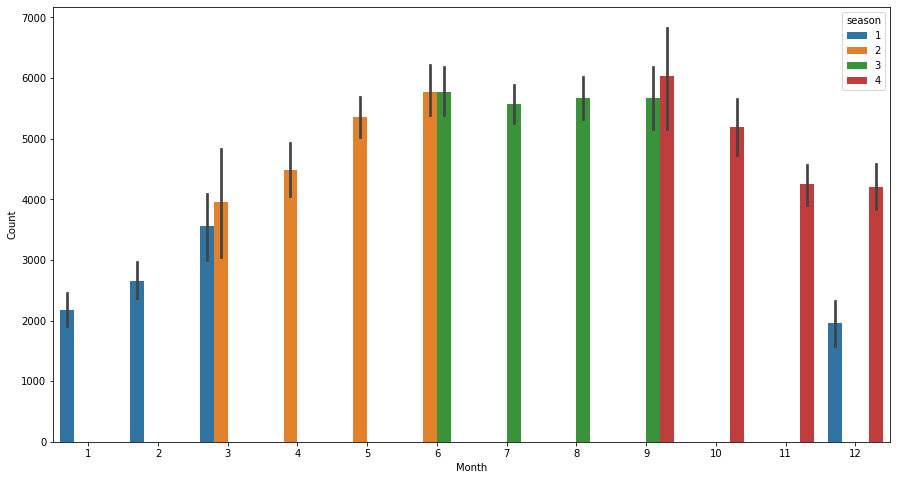

In [21]:
fig,ax=pl.subplots(figsize=(15,8))
sns.barplot(x='mnth',y='cnt',data=bike[['mnth','cnt','season']],hue='season',ax=ax)
pl.xlabel('Month')
pl.ylabel('Count')

Four seasons : 1-spring , 2-summer , 3 - fall and 4 - winter.

The above graph intexmixes the season with Month.From the above graph , we can observe that the sum of the  bike count is maximum for fall and then for summer and winter(Refer In[12]).

Outlier Analysis

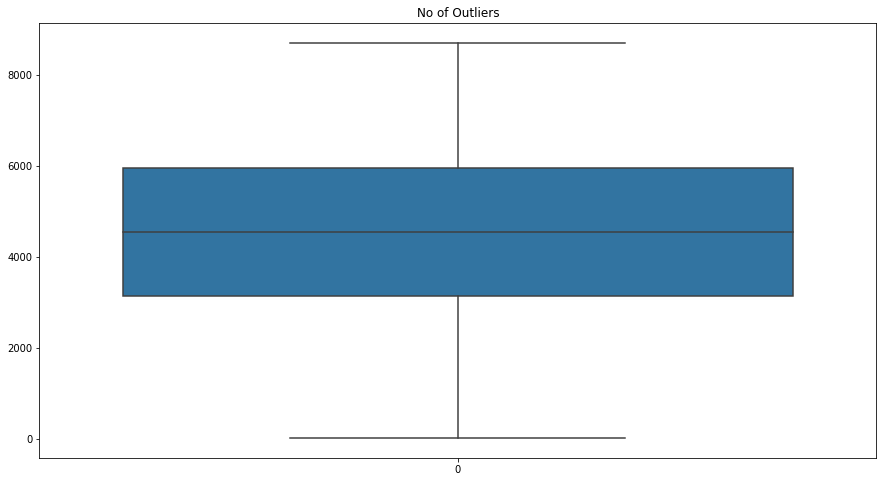

In [44]:
fig,ax=pl.subplots(figsize=(15,8))
sns.boxplot(data=bike['cnt'])
ax.set_title('No of Outliers')
pl.show()

No outliers for the bike count.Therfore no outlier analysis needed.

In [26]:
bike.dtypes

instant          int64
dteday          object
season        category
yr            category
mnth          category
holiday       category
weekday       category
workingday    category
weathersit    category
temp           float64
hum            float64
windspeed      float64
casual           int64
registered       int64
cnt              int64
dtype: object

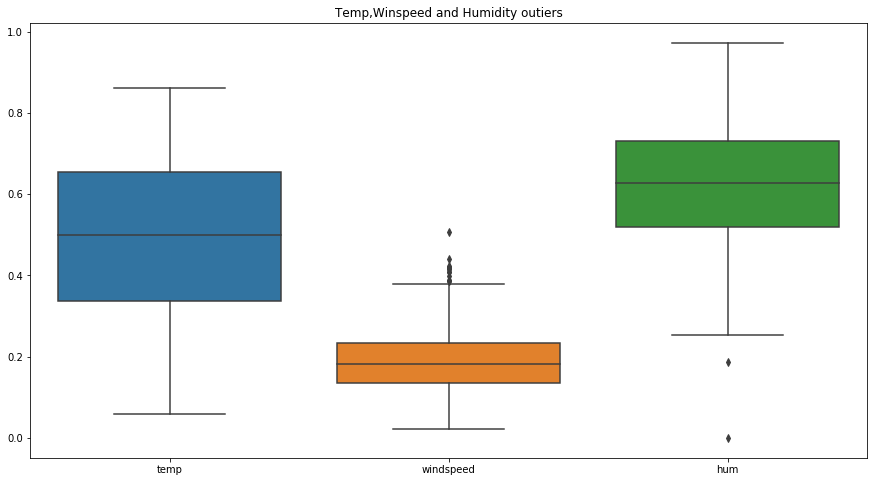

In [23]:
#fig,ax=pl.subplots(figsize=(5,8))
fig,ax=pl.subplots(figsize=(15,8))
#Box plot for Temp_windspeed_humidity_outliers
sns.boxplot(data=bike[['temp','windspeed','hum']])
ax.set_title('Temp,Winspeed and Humidity outiers')
pl.show()

No outliers for temp , but there are outliers for windspeed and humidity.

The outliers for windspeed and humidity can be removed via Mean , median or KNN.


In [27]:
wind_hum = pd.DataFrame(bike,columns=['windspeed','hum'])

In [28]:
cnames = ['windspeed','hum']

for i in cnames:
    print(i)
    q75,q25=np.percentile(wind_hum.loc[:,i],[75,25]) # Divide data into 75%quantile and 25%quantile.
    print(q75)
    print(q25)
    iqr=q75-q25 #Inter quantile range
    print(iqr)
    min=q25-(iqr*1.5) #inner fence
    max=q75+(iqr*1.5) #outer fence
    print(min)
    print(max)
    wind_hum.loc[wind_hum.loc[:,i]<min,:i]=np.nan  #Replace with NA
    wind_hum.loc[wind_hum.loc[:,i]>max,:i]=np.nan 
    

windspeed
0.2332145
0.13495
0.0982645
-0.012446750000000034
0.38061125
hum
0.7302085
0.52
0.21020850000000002
0.20468725
1.0455212500000002


In [29]:
wind_hum['windspeed']=wind_hum['windspeed'].fillna(wind_hum['windspeed'].mean())
wind_hum['hum']=wind_hum['hum'].fillna(wind_hum['hum'].mean())

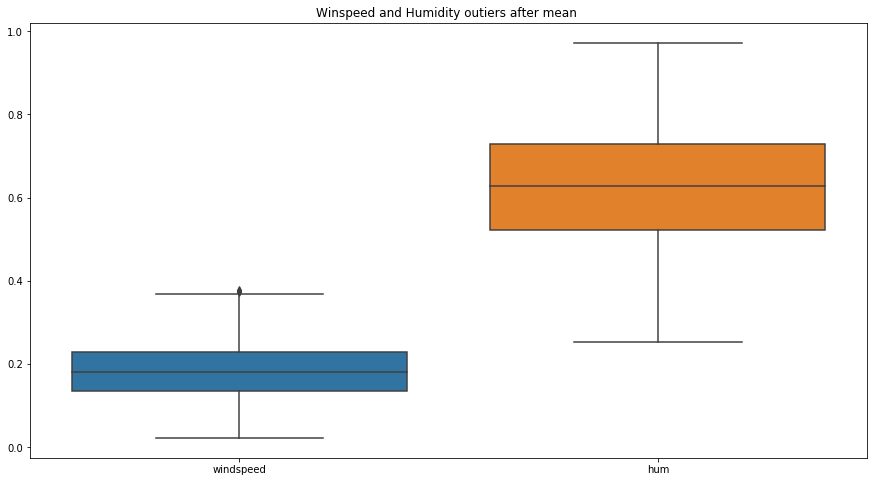

In [30]:
fig,ax=pl.subplots(figsize=(15,8))
#Box plot for Temp_windspeed_humidity_outliers
sns.boxplot(data=wind_hum[['windspeed','hum']])
ax.set_title('Winspeed and Humidity outiers after mean ')
pl.show()

Outliers for humidity have been removed , but there are some present for windspeed.

Lets now impute the outlier with median and see if there's any outlier/s present.

In [100]:
wind_hum1 = pd.DataFrame(bike,columns=['windspeed','hum'])

In [101]:
for i in cnames:
    print(i)
    q75,q25=np.percentile(wind_hum1.loc[:,i],[75,25]) # Divide data into 75%quantile and 25%quantile.
    print(q75)
    print(q25)
    iqr=q75-q25 #Inter quantile range
    print(iqr)
    min=q25-(iqr*1.5) #inner fence
    max=q75+(iqr*1.5) #outer fence
    print(min)
    print(max)
    wind_hum1.loc[wind_hum1.loc[:,i]<min,:i]=np.nan  #Replace with NA
    wind_hum1.loc[wind_hum1.loc[:,i]>max,:i]=np.nan 
    

windspeed
0.2332145
0.13495
0.0982645
-0.012446750000000034
0.38061125
hum
0.7302085
0.52
0.21020850000000002
0.20468725
1.0455212500000002


In [103]:
wind_hum1.loc[wind_hum.loc[:,i]<min,:i]=np.nan  #Replace with NA
wind_hum1.loc[wind_hum.loc[:,i]>max,:i]=np.nan 
    

In [104]:
wind_hum1['windspeed']=wind_hum1['windspeed'].fillna(wind_hum1['windspeed'].median())
wind_hum1['hum']=wind_hum1['hum'].fillna(wind_hum1['hum'].median())

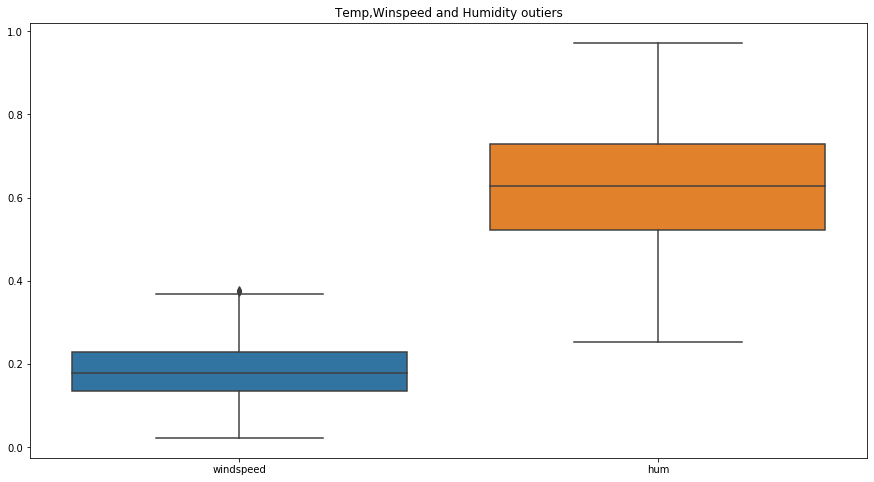

In [105]:
#For Median
fig,ax=pl.subplots(figsize=(15,8))
#Box plot for Temp_windspeed_humidity_outliers
sns.boxplot(data=wind_hum1[['windspeed','hum']])
ax.set_title('Outlier after median imputation')
pl.show()

Imputing the outliers with median bears the same result as it did with mean.

We'll try it with KNN Imputation

In [112]:
wind_hum = pd.DataFrame(bike,columns=['windspeed','hum'])

In [113]:
for i in cnames:
    print(i)
    q75,q25=np.percentile(wind_hum.loc[:,i],[75,25]) # Divide data into 75%quantile and 25%quantile.
    print(q75)
    print(q25)
    iqr=q75-q25 #Inter quantile range
    print(iqr)
    min=q25-(iqr*1.5) #inner fence
    max=q75+(iqr*1.5) #outer fence
    print(min)
    print(max)
    wind_hum.loc[wind_hum.loc[:,i]<min,:i]=np.nan  #Replace with NA
    wind_hum.loc[wind_hum.loc[:,i]>max,:i]=np.nan 
    

windspeed
0.2332145
0.13495
0.0982645
-0.012446750000000034
0.38061125
hum
0.7302085
0.52
0.21020850000000002
0.20468725
1.0455212500000002


In [114]:
wind_hum = pd.DataFrame( KNN(k=3).fit_transform(wind_hum) , columns=wind_hum.columns)

Imputing row 1/731 with 0 missing, elapsed time: 0.173
Imputing row 101/731 with 0 missing, elapsed time: 0.256
Imputing row 201/731 with 0 missing, elapsed time: 0.256
Imputing row 301/731 with 0 missing, elapsed time: 0.256
Imputing row 401/731 with 0 missing, elapsed time: 0.256
Imputing row 501/731 with 0 missing, elapsed time: 0.256
Imputing row 601/731 with 0 missing, elapsed time: 0.262
Imputing row 701/731 with 0 missing, elapsed time: 0.263
[KNN] Warning: 4/1462 still missing after imputation, replacing with 0


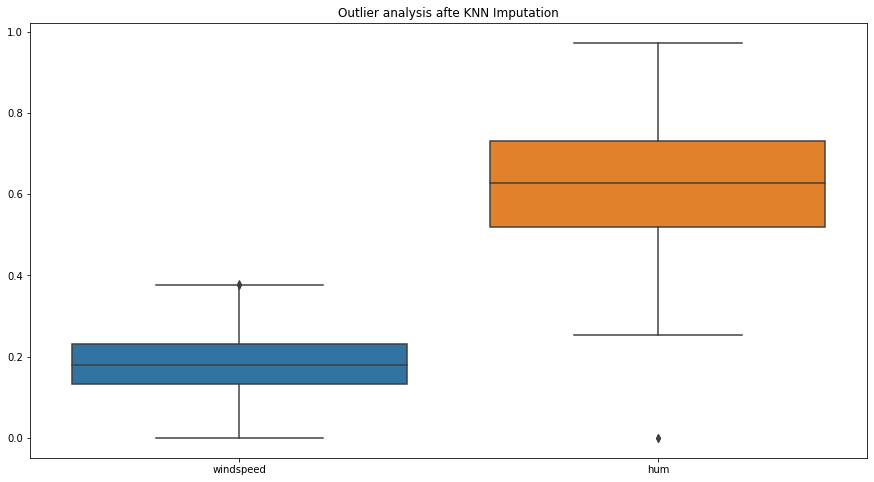

In [115]:
fig,ax=pl.subplots(figsize=(15,8))
#Box plot for Temp_windspeed_humidity_outliers
sns.boxplot(data=wind_hum[['windspeed','hum']])
ax.set_title('Outlier analysis afte KNN Imputation')
pl.show()

There are some outliers present after KNN Imputation in humidity and same number of windspeed outliers are present for the windspeed attribute.


From the above graphs of analysing outliers post imputation with KNN , Mean and Median , i'll go with mean.

In [31]:
bike['windspeed'] = bike['windspeed'].replace(wind_hum['windspeed'])

In [32]:
bike['hum'] = bike['hum'].replace(wind_hum['hum'])

Incorporation of the imputed humidity(hum) and winspeed into bike is completed.

Before diving into model creation , we'll look for correlation between variables for the purpose of Dimensionaliy Reduction

In [33]:
bike.dtypes

instant          int64
dteday          object
season        category
yr            category
mnth          category
holiday       category
weekday       category
workingday    category
weathersit    category
temp           float64
hum            float64
windspeed      float64
casual           int64
registered       int64
cnt              int64
dtype: object

In [35]:
bike_numeric = bike[['temp','hum','windspeed','casual','registered','cnt']].corr()

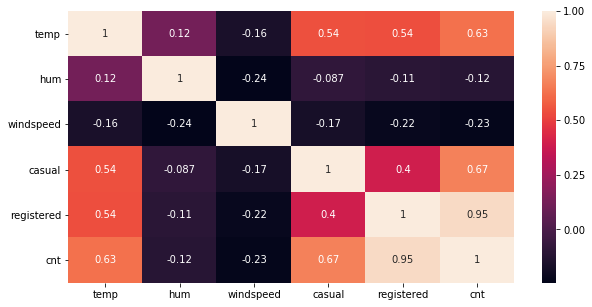

In [36]:
pl.figure(figsize=(10,5))
sns.heatmap(bike_numeric,annot=True)
ax.set_title("Correlation Matrix")
pl.show()


From the above heatmap , we can observe that casual and registered are heavily co-related to cnt.
Therefore we will drop them out of the bike dataframe.

Also , the other reason is that casual and registered is directly related to cnt

In [37]:
bike=bike.drop(columns={'casual','registered'})

In [348]:
#bike = bike.drop(columns='dteday')
bike = bike.drop(columns='yr')


In [39]:
df = bike

In [350]:
X_train,X_test,y_train,y_test=train_test_split(bike.iloc[:,0:-1],bike.iloc[:,-1],test_size=0.3, random_state=42)

In [351]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Model's Summary


In [352]:
print('Coefficient of determination :',regressor.score(X_train,y_train))
print('Model coefficients :',regressor.coef_)
print('Model intercept value :',regressor.intercept_)

Coefficient of determination : 0.5228300533256651
Model coefficients : [  474.22040218   -24.34334219  -396.09580641    57.65867402
    74.00129022  -381.59827445  5606.56059591 -2426.70612135
 -3158.26287704]
Model intercept value : 3184.501475939099


Coefficient of multiple determination or R^2 turns out to be 52.28% i.e. the model is able to explain 78.65% of the variance and model intercept value is 3184.50 i.e. value of cnt when every other feature is valued 0 

In [353]:
coeff_df = pd.DataFrame(regressor.coef_, X_train.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
season,474.220402
mnth,-24.343342
holiday,-396.095806
weekday,57.658674
workingday,74.001290
weathersit,-381.598274
temp,5606.560596
hum,-2426.706121
windspeed,-3158.262877


The following data table showcases the coefficent table of the model generated.
The coefficient indicates change in the response variable when the predictor variable changes by a singular unit

Thus , for a unit change in yr , the bike count changes by 1984.037 amount.
Similarly , for a unit change in temperature , the bike count changes by 5250 amount - which seems highly disproportionate

doesn't make sense.

Once the model has been trained , we will predict the outcome of the test data and compare it with the actual.

In [354]:
y_pred = regressor.predict(X_test)

In [357]:
df1

,Actual,Predicted
703,6606,4934.229117
33,1550,2641.569790
300,3747,4145.483502
456,6041,3474.706395
633,7538,5624.035366
557,7264,6304.049518
39,1605,2052.388876
356,2209,2908.944208
559,7499,6703.673301
514,5743,5275.453353


In [356]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [358]:
rmse=math.sqrt(metrics.mean_squared_error(y_test,y_pred))
#Mean absolute error
mae=metrics.mean_absolute_error(y_test,y_pred)
print('Root mean square error :',rmse)
print('Mean absolute error :',mae)

Root mean square error : 1355.1011224422946
Mean absolute error : 1149.4857479537634


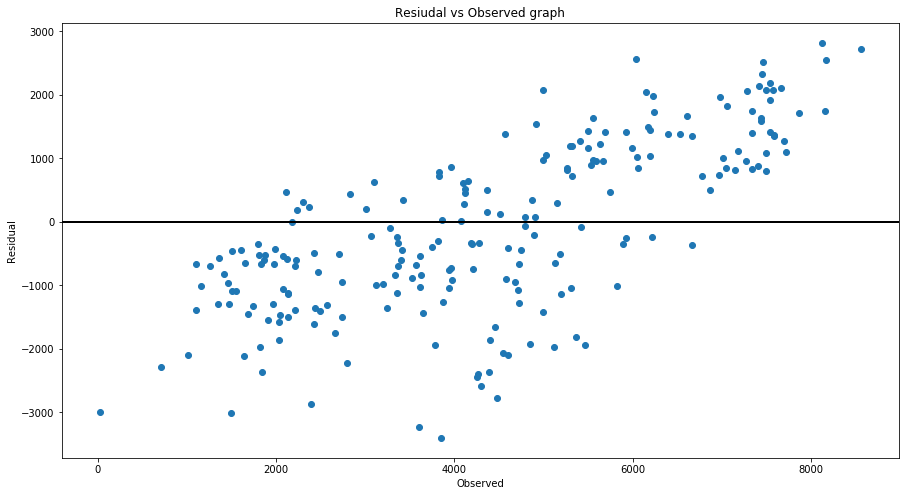

In [359]:
fig,ax=pl.subplots(figsize=(15,8))
ax.scatter(y_test,y_test-y_pred)
ax.axhline(lw=2,color='black')
ax.set_title('Resiudal vs Observed graph')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
pl.show()

Cross validation technique 

In [167]:
from sklearn.model_selection import cross_val_score,cross_val_predict

In [360]:
predict=cross_val_predict(regressor,X_train,y_train,cv=10)

In [169]:
predict

array([5647.1463969 , 4955.69131483, 5828.71245988, 4088.94633575,
       4123.78478157, 6769.51725115, 5646.15070677, 3979.87705598,
       4901.98191141, 3452.31892558, 5051.16221098, 2747.19401221,
       3997.75568815, 5761.96819639, 4661.32606317, 6340.72587384,
       4313.6211889 , 2931.99679994,  831.43772595,  887.78375276,
       7727.16080705, 4065.92943322, 5226.2646293 , 5602.4269816 ,
       7312.59002111, 7649.71651937, 3866.79033176, 3832.98611331,
       1295.01777478, 4408.01209302, 1792.60500312, 2008.28779352,
       1869.58677733, 1528.31000558, 4503.57425569, 5594.11070723,
       6026.11471848, 4462.62165923, 5476.97281251, 5637.35004656,
       6015.09488665, 4521.24519822, 5807.01305457, 5581.82919971,
       3540.80125611, 4157.19669612, 1738.39189248, 3884.43121271,
       4893.88885663, 6915.31772601, 2570.01701103, 5639.15922414,
       6076.03332099, 3317.51747847, 4570.71538854, 3481.1321034 ,
       1333.80957305, 3319.75425146,  860.03822264, 5617.56824

In [361]:
cross_val_score(regressor, X_train, y_train, cv=10)

array([0.47286234, 0.34599107, 0.55247372, 0.66127806, 0.43124941,
       0.54363217, 0.25847592, 0.49897895, 0.49795131, 0.48881289])

In [362]:
print('Average R-squared scores :',np.average(cross_val_score(regressor, X_train, y_train, cv=10)))

Average R-squared scores : 0.475170584916446


The average R-squared score turns out to be 47.5% on 10 fold validation which means that the predictor variable is only able to explain 47.5% of the variance in the target or response variable which cnt(bike cnt).

Decision Tree Regression 

In [363]:
dtr=DecisionTreeRegressor(min_samples_split=2,max_leaf_nodes=10)


In [364]:
dtr.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=10, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [365]:
dtr_pred=dtr.predict(X_test)

In [366]:
rmsedt=math.sqrt(metrics.mean_squared_error(y_test,dtr_pred))
#Mean absolute error
maedt=metrics.mean_absolute_error(y_test,dtr_pred)
print('Root mean square error :',rmsedt)
print('Mean absolute error :',maedt)

Root mean square error : 1336.306876724707
Mean absolute error : 1129.5225439592414


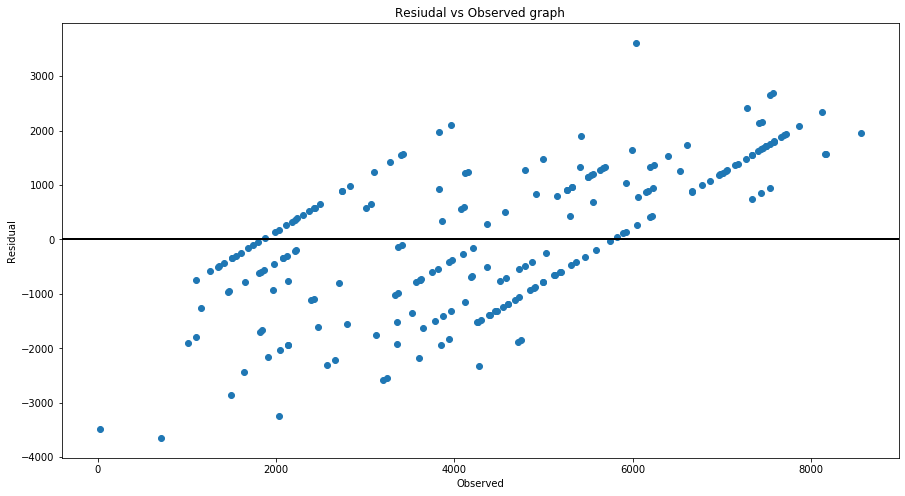

In [367]:
fig,ax=pl.subplots(figsize=(15,8))
ax.scatter(y_test,y_test-dtr_pred)
ax.axhline(lw=2,color='black')
ax.set_title('Resiudal vs Observed graph')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
pl.show()

In [311]:
dtr.score(X_train,y_train)

0.8082151777539757

In [369]:
predict_DT=cross_val_predict(dtr,X_train,y_train,cv=10)


In [371]:
r2_scores = cross_val_score(dtr, X_train, y_train, cv=10)
print('R-squared scores :',np.average(r2_scores))

R-squared scores : 0.48172191534027087


In [368]:
rmsedt=math.sqrt(metrics.mean_squared_error(y_test,dtr_pred))
#Mean absolute error
maedt=metrics.mean_absolute_error(y_test,dtr_pred)
print('Root mean square error :',rmsedt)
print('Mean absolute error :',maedt)

Root mean square error : 1336.306876724707
Mean absolute error : 1129.5225439592414


Building a Random Forest Model

In [372]:
rf=RandomForestRegressor(n_estimators=100)

In [373]:
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [374]:
rf_score =rf.score(X_train,y_train)

In [375]:
rf_score

0.9433242301891731

The Random Forest Model generated is 97.97% accurate

Prediction 

In [380]:
rf_pred = rf.predict(X_test)

In [382]:
rmseRF = math.sqrt(metrics.mean_squared_error(y_test,rf_pred))
print('Root mean square error :',rmseRF)
#Mean absolute error
maeRF=metrics.mean_absolute_error(y_test,rf_pred)
print('Mean absolute error :',maeRF)

Root mean square error : 1252.2098741682823
Mean absolute error : 1055.670909090909


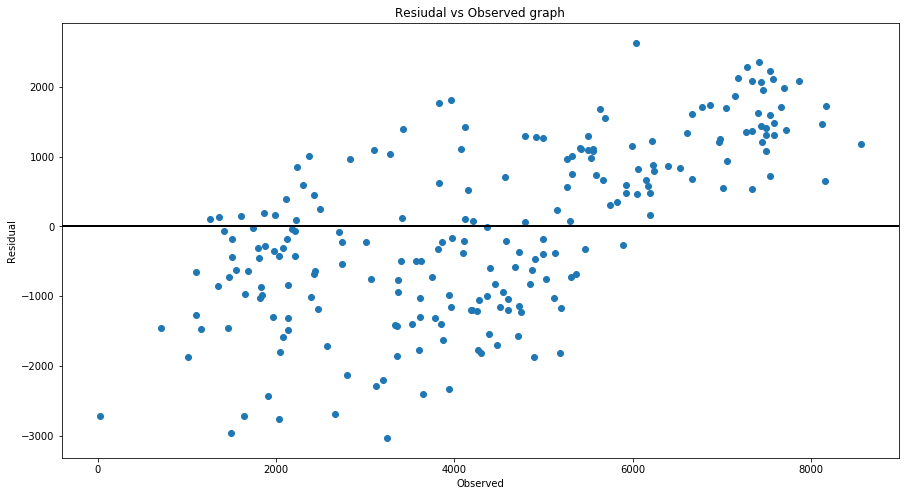

In [384]:
fig,ax=pl.subplots(figsize=(15,8))
ax.scatter(y_test,y_test-rf_pred)
ax.axhline(lw=2,color='black')
ax.set_title('Resiudal vs Observed graph')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
pl.show()

In [386]:
predictRF=cross_val_predict(rf,X_train,y_train,cv=3)

In [387]:
r2_RF = cross_val_score(rf, X_train, y_train, cv=10)

In [388]:
print("Average r2 score for random forest is ", np.average(r2_RF))

Average r2 score for random forest is  0.5756318785425412


Average r2 score for random forest is  0.8420167902882654 which means that the model can explain 84.2% variance present around the predictor variables


The root mean square error and mean absolute error is least for Random Forest 
Thus , we will select the Random Forest as the apt model for predicting bike count

In [391]:
print ("Sorted Feature Importance:")
feat_import = sorted(zip(rf.feature_importances_, list(X_train)), reverse=True)
print(pd.DataFrame(feat_import))

Sorted Feature Importance:
          0           1
0  0.579614        temp
1  0.153561         hum
2  0.096795   windspeed
3  0.057304      season
4  0.045295        mnth
5  0.036909     weekday
6  0.017075  weathersit
7  0.010718  workingday
8  0.002730     holiday
